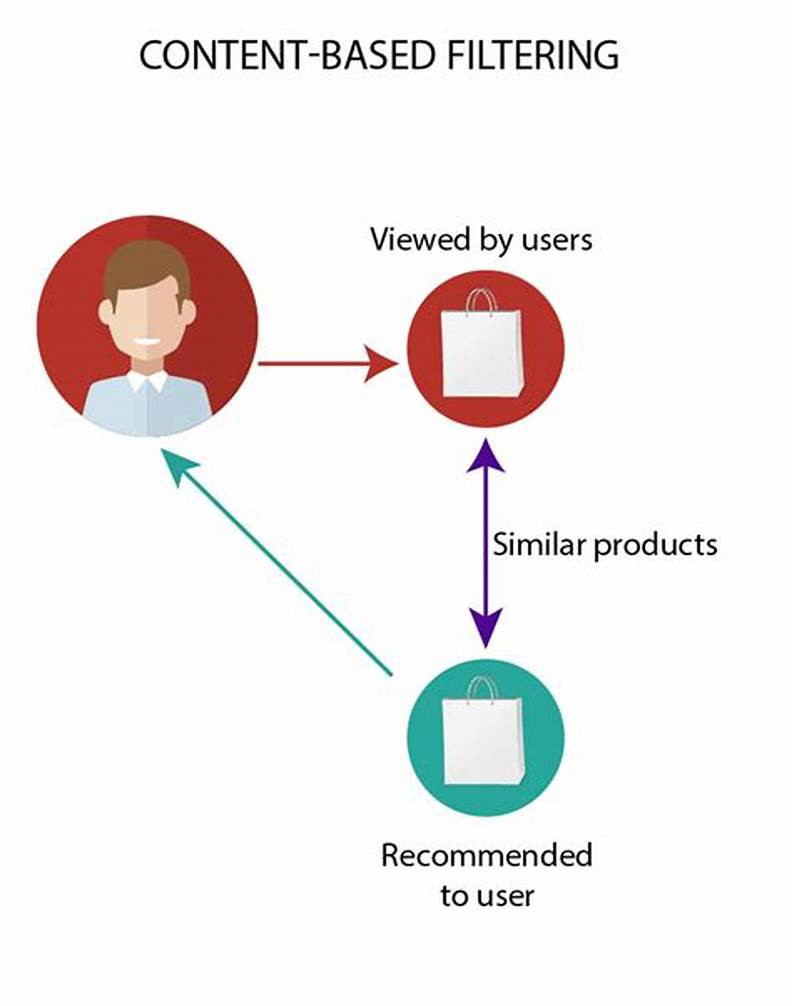

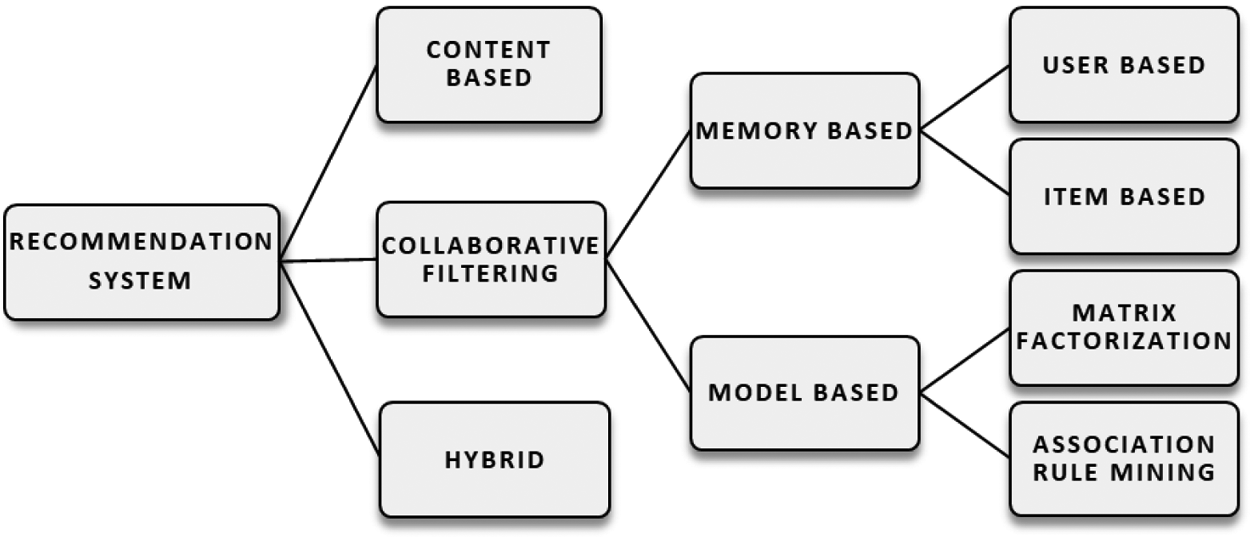

**Table of Contents**
1. Imports
2. Features and Similarity
3. Implementation

## 1. Imports

In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
metadata=pd.read_csv("Dataset/prepared/final_metadata.csv")
metadata.head()

,movieId,title,year,genres,cast,director,collection,production_companies,vote_count,vote_average,popularity,keywords
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,Toy Story Collection,Pixar Animation Studios,5415.0,7.7,21.946943,"jealousy, toy, boy, friendship, friends, rival..."
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,NaN,"TriStar Pictures, Teitler Film, Interscope Com...",2413.0,6.9,17.015539,"disappearance, based on children's book, new h..."
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,Grumpy Old Men Collection,"Warner Bros., Lancaster Gate",92.0,6.5,11.712900,"fishing, best friend, duringcreditsstinger"
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,NaN,Twentieth Century Fox Film Corporation,34.0,6.1,3.859495,"based on novel, interracial relationship, sing..."
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,Father of the Bride Collection,"Sandollar Productions, Touchstone Pictures",173.0,5.7,8.387519,"baby, midlife crisis, confidence, aging, daugh..."


## 2. Features and Similarity

In [3]:
# this is done due to large dataset and limitation of system
# you may use the desired part as per your system
metadata=metadata.head(20000)

metadata['features']=''
metadata.fillna('',inplace=True)
metadata['features']=metadata['title']+', '+metadata['genres']+', '+metadata['cast']+', '+metadata['director']+', '+metadata['production_companies']+', '+metadata['collection']+', '+metadata['features']
metadata.head()

,movieId,title,year,genres,cast,director,collection,production_companies,vote_count,vote_average,popularity,keywords,features
0,862,Toy Story,1995,"Animation, Comedy, Family","Tom Hanks, Tim Allen, Don Rickles",John Lasseter,Toy Story Collection,Pixar Animation Studios,5415.0,7.7,21.946943,"jealousy, toy, boy, friendship, friends, rival...","Toy Story, Animation, Comedy, Family, Tom Hank..."
1,8844,Jumanji,1995,"Adventure, Fantasy, Family","Robin Williams, Jonathan Hyde, Kirsten Dunst",Joe Johnston,,"TriStar Pictures, Teitler Film, Interscope Com...",2413.0,6.9,17.015539,"disappearance, based on children's book, new h...","Jumanji, Adventure, Fantasy, Family, Robin Wil..."
2,15602,Grumpier Old Men,1995,"Romance, Comedy","Walter Matthau, Jack Lemmon, Ann-Margret",Howard Deutch,Grumpy Old Men Collection,"Warner Bros., Lancaster Gate",92.0,6.5,11.712900,"fishing, best friend, duringcreditsstinger","Grumpier Old Men, Romance, Comedy, Walter Matt..."
3,31357,Waiting to Exhale,1995,"Comedy, Drama, Romance","Whitney Houston, Angela Bassett, Loretta Devine",Forest Whitaker,,Twentieth Century Fox Film Corporation,34.0,6.1,3.859495,"based on novel, interracial relationship, sing...","Waiting to Exhale, Comedy, Drama, Romance, Whi..."
4,11862,Father of the Bride Part II,1995,Comedy,"Steve Martin, Diane Keaton, Martin Short",Charles Shyer,Father of the Bride Collection,"Sandollar Productions, Touchstone Pictures",173.0,5.7,8.387519,"baby, midlife crisis, confidence, aging, daugh...","Father of the Bride Part II, Comedy, Steve Mar..."


In [4]:
features=metadata[['movieId','features']]
features.head()

,movieId,features
0,862,"Toy Story, Animation, Comedy, Family, Tom Hank..."
1,8844,"Jumanji, Adventure, Fantasy, Family, Robin Wil..."
2,15602,"Grumpier Old Men, Romance, Comedy, Walter Matt..."
3,31357,"Waiting to Exhale, Comedy, Drama, Romance, Whi..."
4,11862,"Father of the Bride Part II, Comedy, Steve Mar..."


In [5]:
movies=metadata[['movieId','title']]
movies['title']=movies['title'].str.lower()
movies.head()

/tmp/ipykernel_5936/2259360138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['title']=movies['title'].str.lower()


,movieId,title
0,862,toy story
1,8844,jumanji
2,15602,grumpier old men
3,31357,waiting to exhale
4,11862,father of the bride part ii


In [6]:
movie_dict=dict(movies.values)
dict(list(movie_dict.items())[:10])

{862: 'toy story',
 8844: 'jumanji',
 15602: 'grumpier old men',
 31357: 'waiting to exhale',
 11862: 'father of the bride part ii',
 949: 'heat',
 11860: 'sabrina',
 45325: 'tom and huck',
 9091: 'sudden death',
 710: 'goldeneye'}

In [7]:
features['features']=features['features'].str.split(', ').to_list()
features['features'] = [' '.join(map(str, l)) for l in features['features']]
features.head()

/tmp/ipykernel_5936/1951201028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['features']=features['features'].str.split(', ').to_list()
/tmp/ipykernel_5936/1951201028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['features'] = [' '.join(map(str, l)) for l in features['features']]


,movieId,features
0,862,Toy Story Animation Comedy Family Tom Hanks Ti...
1,8844,Jumanji Adventure Fantasy Family Robin William...
2,15602,Grumpier Old Men Romance Comedy Walter Matthau...
3,31357,Waiting to Exhale Comedy Drama Romance Whitney...
4,11862,Father of the Bride Part II Comedy Steve Marti...


### Similarity
The metrics we are using to calculate similarity between 2 movies(represented in vector form) is cosine-similarity.

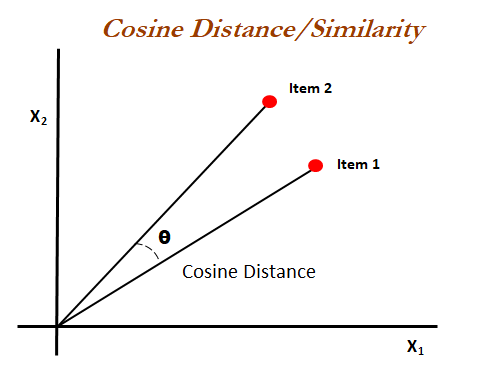

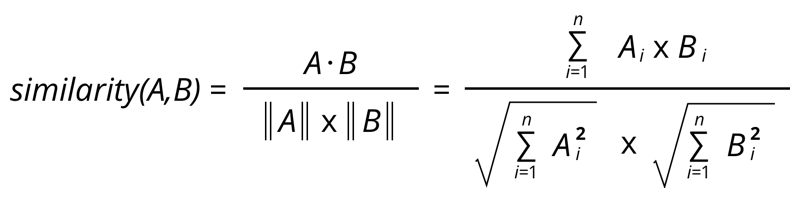

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tf=TfidfVectorizer()
vectors=tf.fit_transform(features['features'])
cosine=cosine_similarity(vectors)
np.fill_diagonal(cosine,0)
similarity=pd.DataFrame(cosine,index=features.movieId,columns=features.movieId)

similarity.iloc[:10,:10]

movieId,862,8844,15602,31357,11862,949,11860,45325,9091,710
movieId,,,,,,,,,,
862,0.000000,0.016606,0.014889,0.005432,0.015013,0.000000,0.004452,0.046706,0.000000,0.012374
8844,0.016606,0.000000,0.000000,0.011358,0.006251,0.000000,0.006068,0.090937,0.020980,0.015310
15602,0.014889,0.000000,0.000000,0.012807,0.014160,0.038628,0.010496,0.000000,0.000000,0.011671
31357,0.005432,0.011358,0.012807,0.000000,0.005167,0.003823,0.012536,0.003830,0.000000,0.000000
11862,0.015013,0.006251,0.014160,0.005167,0.000000,0.000000,0.085162,0.006663,0.005723,0.073075
949,0.000000,0.000000,0.038628,0.003823,0.000000,0.000000,0.034351,0.016055,0.019486,0.021111
11860,0.004452,0.006068,0.010496,0.012536,0.085162,0.034351,0.000000,0.006468,0.046612,0.013951
45325,0.046706,0.090937,0.000000,0.003830,0.006663,0.016055,0.006468,0.000000,0.056612,0.027450
9091,0.000000,0.020980,0.000000,0.000000,0.005723,0.019486,0.046612,0.056612,0.000000,0.032187


## 3. Implementation

In [9]:
def recommend(id,similarity):

    l=list(similarity.columns) # list of all movies
    s=list(enumerate(similarity[id])) # list of all cosine-similarity value for other movies

    # return if id is not present
    if id not in l:
        return []
    
    # sort the cosine values in decreasing order
    s=sorted(s,key=lambda x: x[1], reverse=True)
    s=s[0:9] 

    # extracting the ids of the top-similar values
    index=[add[0] for add in s]
    index=[l[x] for x in index]

    return index

In [10]:
recommend(862,similarity)

[863, 10193, 13927, 13926, 13925, 13928, 9487, 49013, 920]

In [11]:
def find_similar_movies(name,movies_dict,similarity):
    name=name.lower()
    if name not in movies_dict.values():
        print("Movie not Found")
        return 
    # id=movies_dict.keys()[movies_dict.values().index(16)]
    id=-1
    for a,b in movies_dict.items():
        if b==name:
            id=a

    a=recommend(id,similarity)
    for i in a:
        print(i,' ',movies_dict[i])


In [12]:
find_similar_movies("toy story",movie_dict,similarity)

863   toy story 2
10193   toy story 3
13927   tin toy
13926   red's dream
13925   luxo jr.
13928   knick knack
9487   a bug's life
49013   cars 2
920   cars


In [13]:
find_similar_movies("the dark knight",movie_dict,similarity)

49026   the dark knight rises
272   batman begins
123025   batman: the dark knight returns, part 1
1124   the prestige
34813   the losers
39514   red
27205   inception
15805   batman & mr. freeze: subzero
17074   the batman superman movie: world's finest


In [14]:
import json

with open("Dataset/prepared/movies_index.json",'w') as fp:
    json.dump(movie_dict,fp)